['Bam Adebayo' 'Giannis Antetokounmpo' 'Deandre Ayton' 'Paolo Banchero'
 'Desmond Bane' 'Harrison Barnes' 'Scottie Barnes' 'RJ Barrett'
 'Bojan Bogdanović' 'Devin Booker' 'Mikal Bridges' 'Jaylen Brown'
 'Jalen Brunson' 'Jimmy Butler' 'Jordan Clarkson' 'Stephen Curry'
 'Anthony Davis' 'DeMar DeRozan' 'Spencer Dinwiddie' 'Luka Dončić'
 'Anthony Edwards' 'Joel Embiid' "De'Aaron Fox" 'Darius Garland'
 'Paul George' 'Josh Giddey' 'Shai Gilgeous-Alexander' 'Jerami Grant'
 'Jalen Green' 'Tyrese Haliburton' 'James Harden' 'Tyler Herro'
 'Buddy Hield' 'Jrue Holiday' 'Kyrie Irving' 'Jaden Ivey'
 'DPOY winner Jaren Jackson Jr.' 'LeBron James' 'Keldon Johnson'
 'Nikola Jokić' 'Kyle Kuzma' 'Zach LaVine' 'Damian Lillard'
 'DPOY nominee Brook Lopez' 'Lauri Markkanen' 'CJ McCollum'
 'Donovan Mitchell' 'DPOY nominee Evan Mobley' 'Ja Morant'
 'Trey Murphy III' 'Dejounte Murray' 'Jamal Murray' 'Kristaps Porziņģis'
 'Julius Randle' 'Terry Rozier' "D'Angelo Russell" 'Domantas Sabonis'
 'Pascal Siakam' 'Anf

<ipython-input-5-914d23b408e4>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tai['names'] = 'Xiao Hui Tai'
<ipython-input-5-914d23b408e4>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tai['PTS'] = Tai['PTS'] * .90
<ipython-input-5-914d23b408e4>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

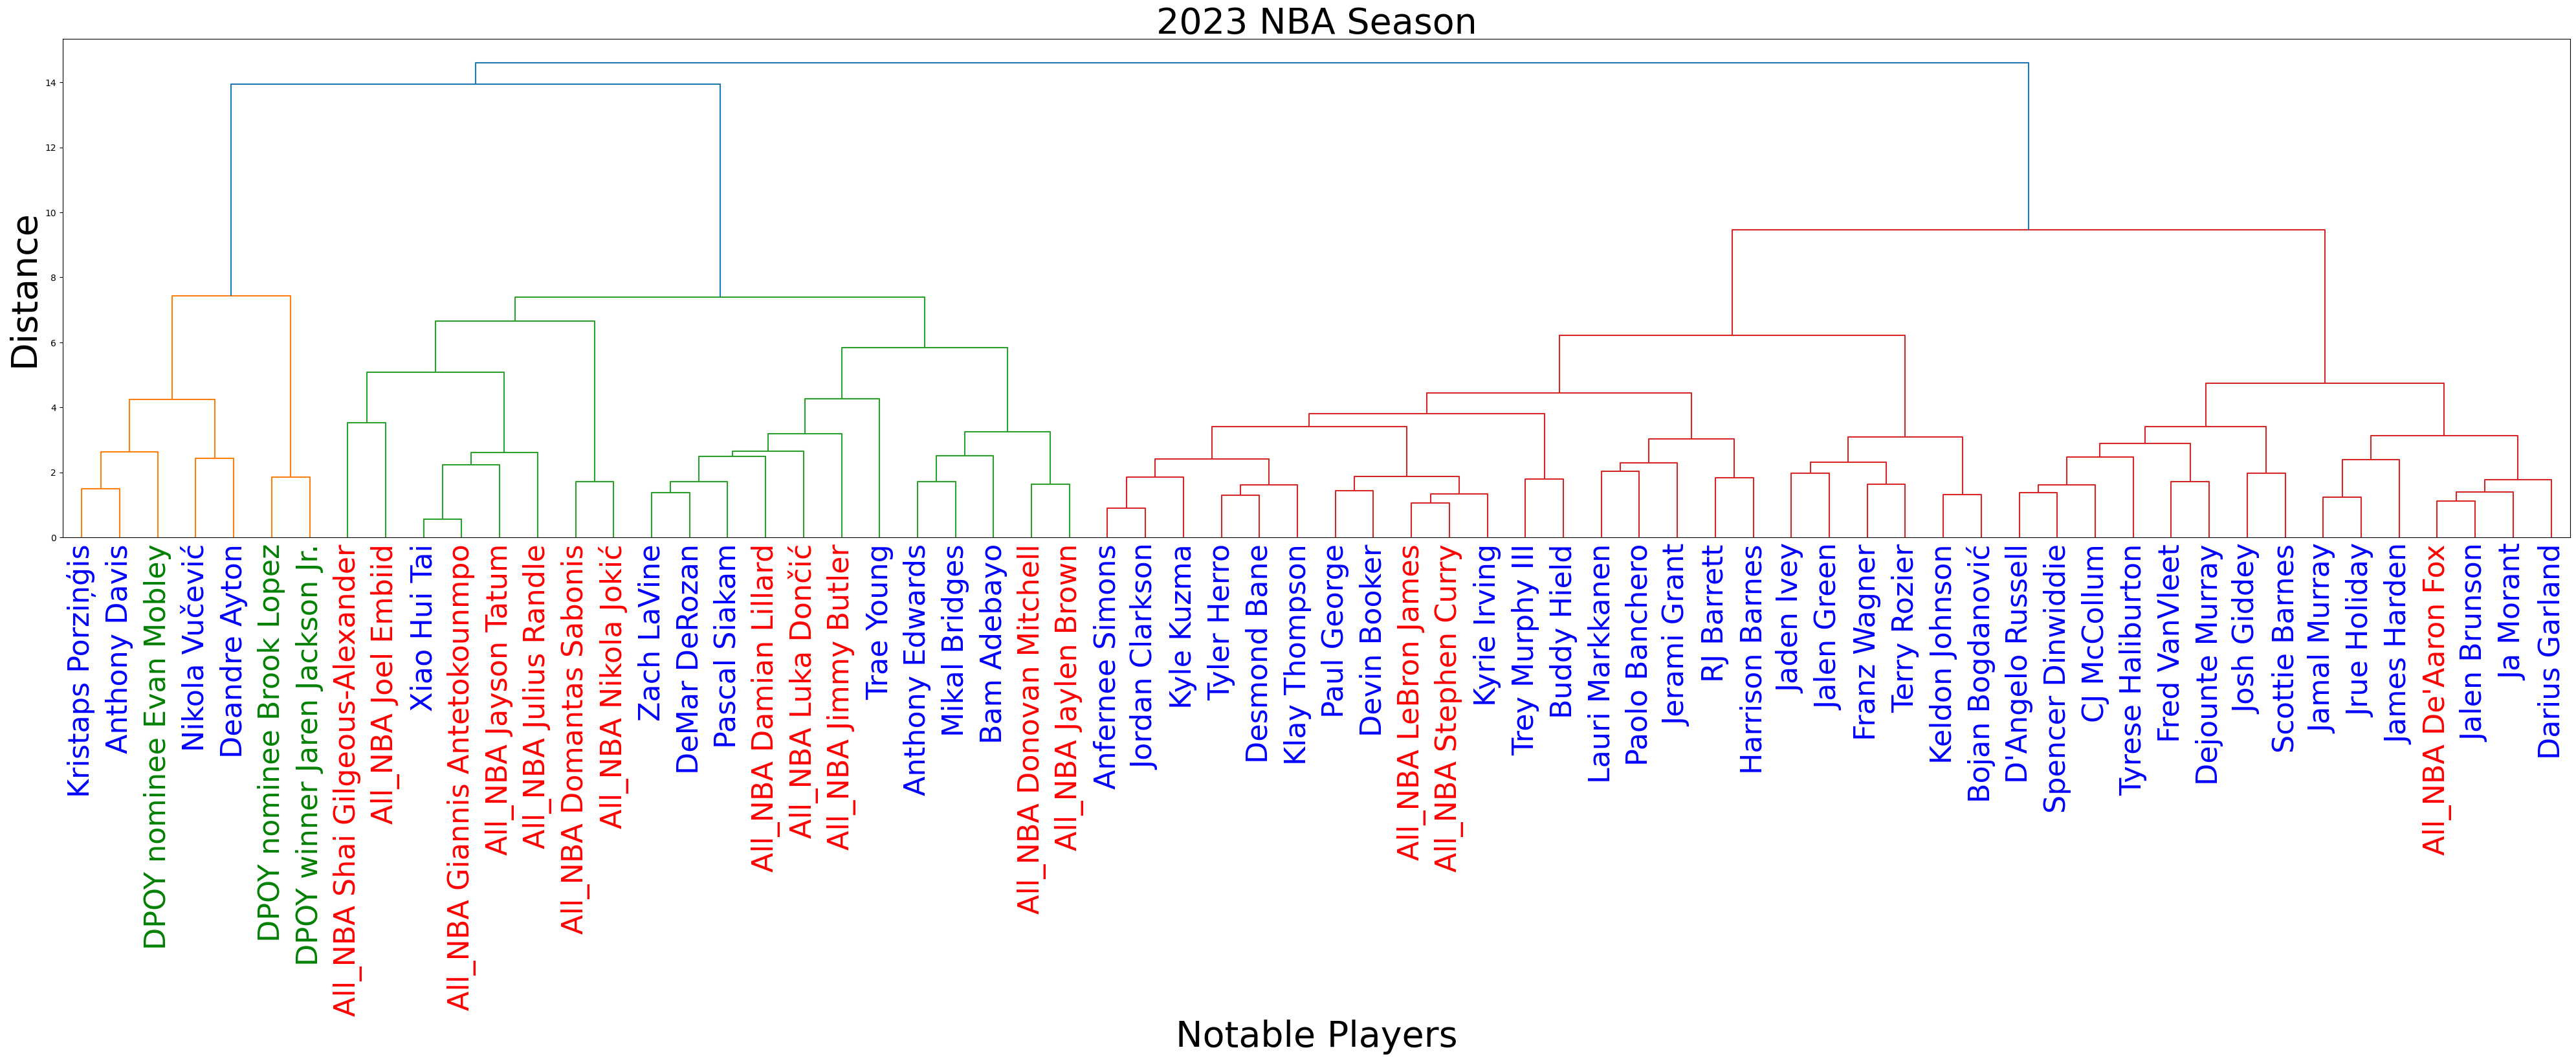

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

#2023

def rename_column(row):
    if row['All_NBA'] == 1:
        return "All_NBA "+row['names']
    else:
        return row['names']

def main():
  main_df = pd.read_csv("/content/scaled_data.csv")
  for year in range(2023,2024):
    df, linked = preprocess_df(main_df, year)
    plt.figure(figsize=(50, 10))
    dendrogram_colored(linked, labels=df['names'].values,
                   orientation='top',
                   distance_sort='descending',
                   show_leaf_counts=True)
    plt.title(str(year) + ' NBA Season', fontsize=40)
    plt.xlabel('Notable Players', fontsize=40)
    plt.ylabel('Distance', fontsize=40)
    plt.show()
    rudy_gobert_row = df[df['names'] == 'Rudy Gobert 2024 MIN']



def preprocess_df(main_df, year):
  df = main_df[(main_df['Year'] == year)]
  df = df[(df['G'] > 0)]
  df = df[(df['PTS'] > 1.25)]
  df = df[(df['GS'] > 1)]
  df['All_NBA'] = df['All_NBA'].apply(lambda x: 0 if x == False else 1)

  df['names']  = df[df.columns[0]]
  df['names'] = df['names'].apply(lambda x:  x[:-9])
  df['names'] = df['names'].apply(lambda x: 'DPOY nominee ' + x if x == 'Brook Lopez' or x ==
'Evan Mobley' else x)
  df['names'] = df['names'].apply(lambda x: 'DPOY winner ' + x if x == 'Jaren Jackson Jr.' else x)
  print(df['names'].values)
  df['names'] = df.apply(rename_column, axis=1)

#easter egg ;)
  Tai = df[(df['names'] == 'All_NBA Giannis Antetokounmpo')]

  Tai['names'] = 'Xiao Hui Tai'

  Tai['PTS'] = Tai['PTS'] * .90
  Tai['TRB'] = Tai['TRB'] * .90
  Tai['FT'] = Tai['FT'] * .90
  df = pd.concat([df, Tai], ignore_index=True)

  df.drop(df.columns[0], axis=1, inplace = True)
  df_cluster = df.drop(['Year', 'names', 'Pos', 'All_NBA', 'Voting_Points', 'All_NBA_Team', 'G', 'GS', 'FT.'], axis=1)
  linked = linkage(df_cluster, method='ward')
  return df, linked




def dendrogram_colored(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)
    ax = plt.gca()
    actual_labels = ax.get_xmajorticklabels()
    actual_labels = [str(label)[13:-3] if str(label)[12] == "'" else str(label)[12:-3] for label in actual_labels]
    actual_labels = [label[2:] if str(label)[1] == "'" else label for label in actual_labels]
    actual_labels = [label[2:] if label[0] == ' ' else label for label in actual_labels]

    leaf_colors = []
    for label in actual_labels:

      if label[:4] == "All_":
        leaf_colors.append('red')
      #highlighting a few names
      elif label[:4] == 'DPOY':
        leaf_colors.append('green')
      else:
        leaf_colors.append('blue')


    ax = plt.gca()
    for label, color in zip(ax.get_xmajorticklabels(), leaf_colors):
        label.set_color(color)
        label.set_size(32)
    return ddata

main()

<ipython-input-6-4d4932c57724>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rudy['names'] = 'Rudy Gobert'
<ipython-input-6-4d4932c57724>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Tai['names'] = 'Xiao Hui Tai'
<ipython-input-6-4d4932c57724>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

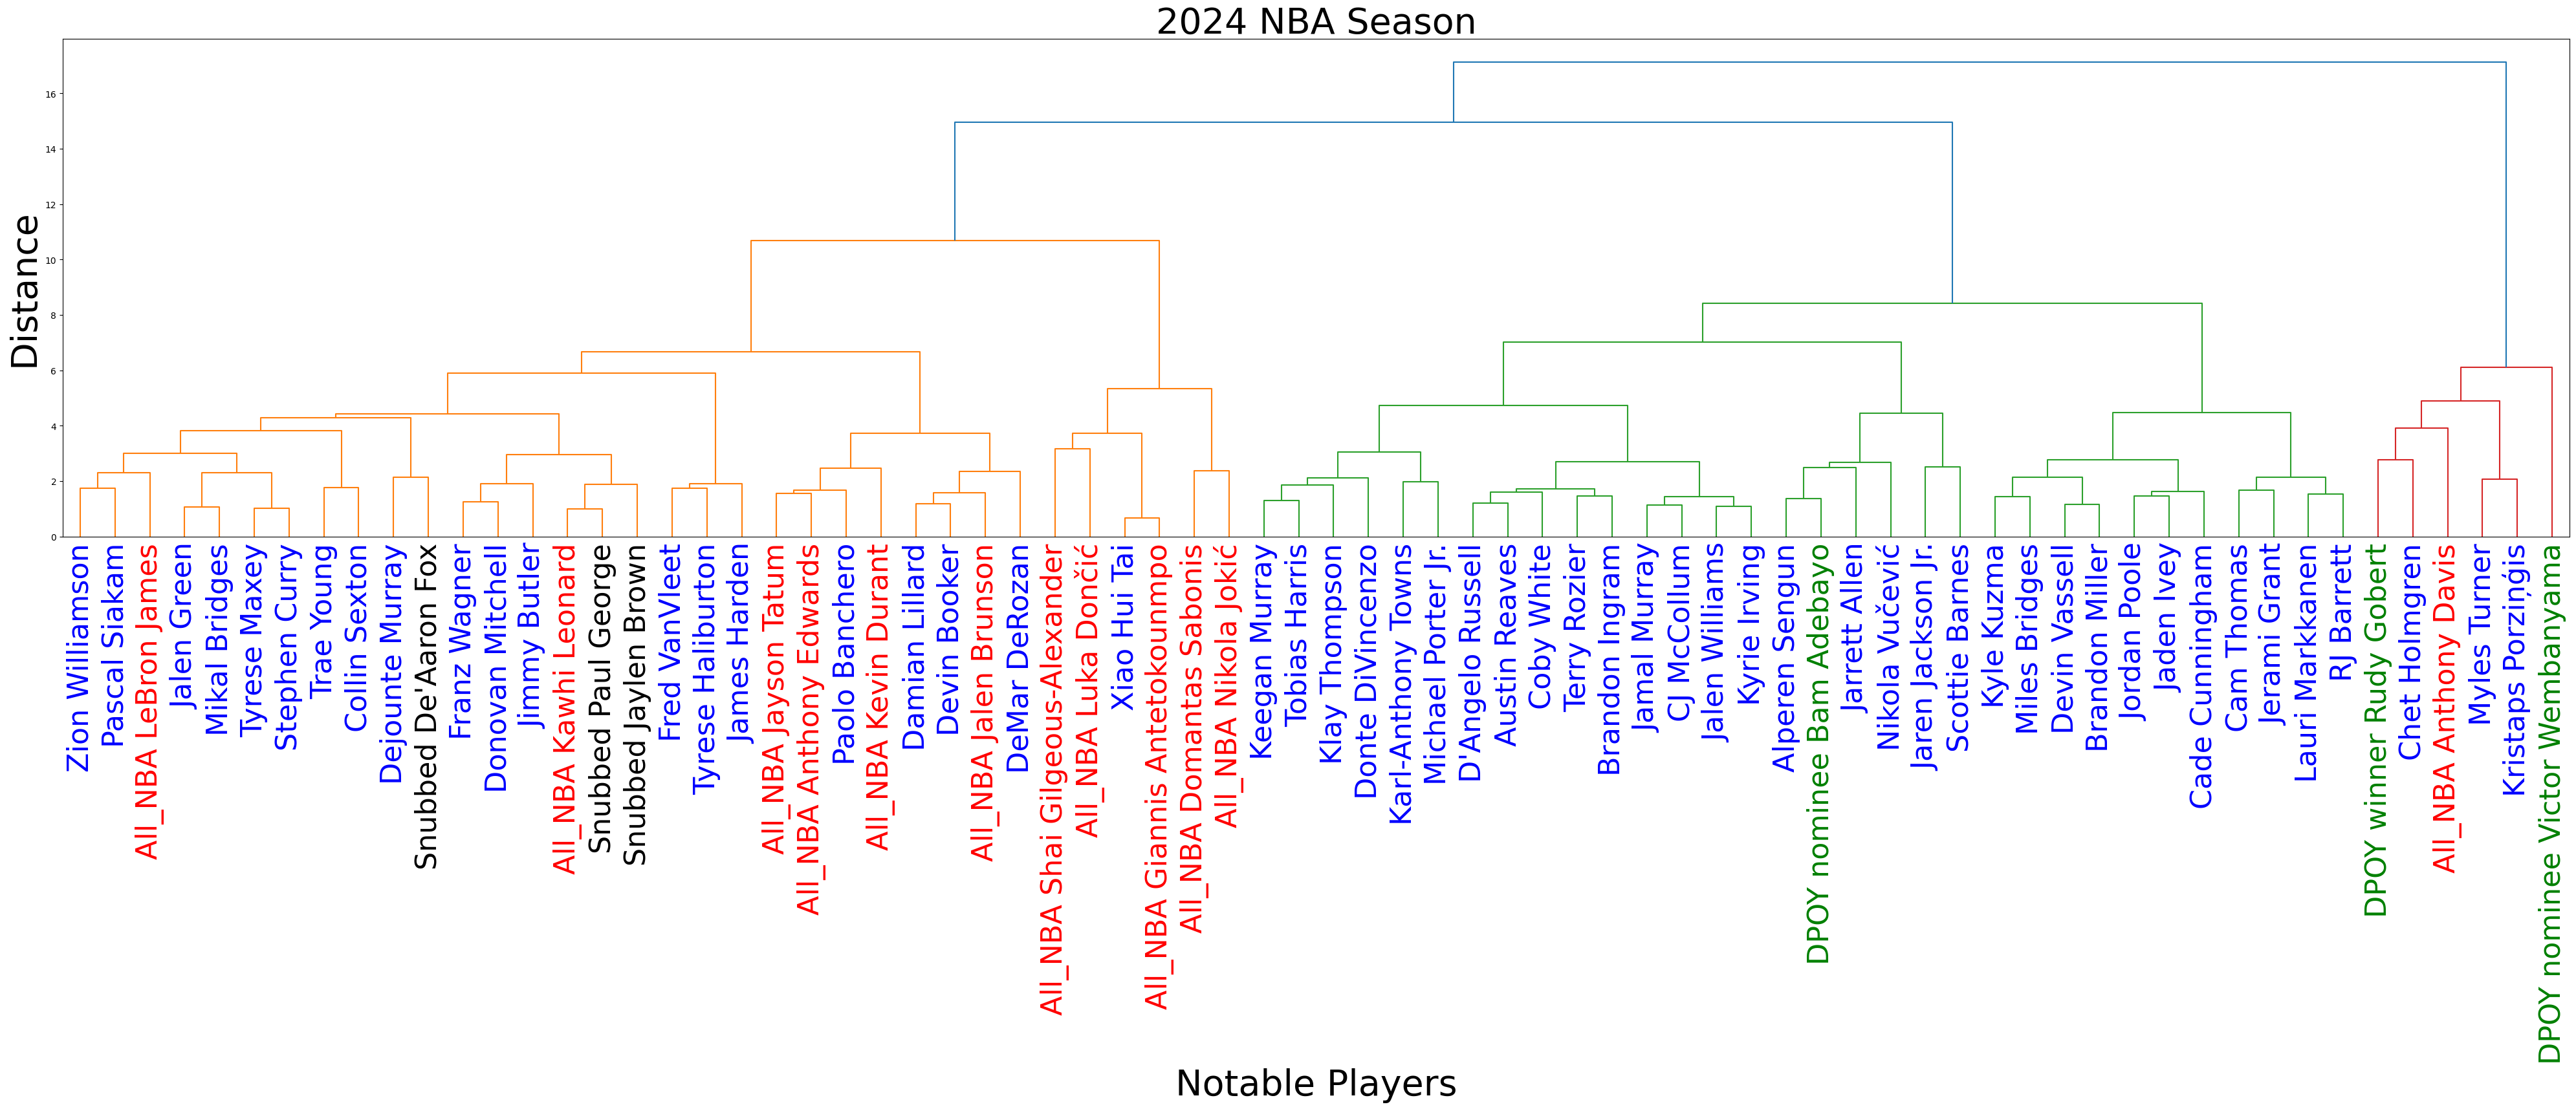

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

test = pd.read_csv("/content/scaled_data.csv")
rudy_gobert_row = test[test['Unnamed: 0'] == 'Rudy Gobert 2024 MIN']


# For 2024:
predicted_all_nba = [
    'Nikola Jokić', 'Giannis Antetokounmpo', 'Luka Dončić', 'Shai Gilgeous-Alexander',
    'Jayson Tatum', 'Anthony Davis', 'LeBron James', 'Domantas Sabonis', 'De\'Aaron Fox',
    'Kevin Durant', 'Anthony Edwards', 'Kawhi Leonard', 'Jalen Brunson', 'Jaylen Brown', 'Paul George'
]
def rename_snubs(row):
    if row['names'].startswith('All_NBA '):
        if row['names'] == 'All_NBA Jaylen Brown':
            row['names'] = 'Snubbed Jaylen Brown'  # Keep the apostrophe in "De'Aaron"
        elif row['names'] == 'All_NBA Paul George':
            row['names'] = 'Snubbed Paul George'
        elif row['names'] == 'All_NBA De\'Aaron Fox':
            row['names'] = 'Snubbed De\'Aaron Fox'
    return row['names']

def rename_column(row, predicted_all_nba):
    if row['names'] in predicted_all_nba:
        return "All_NBA " + row['names']
    else:
        return row['names']


def main():
  main_df = pd.read_csv("/content/scaled_data.csv")
  for year in range(2024,2025):
    df, linked = preprocess_df(main_df, year)
    plt.figure(figsize=(50, 10))
    dendrogram_colored(linked, labels=df['names'].values,
                   orientation='top',
                   distance_sort='descending',
                   show_leaf_counts=True)
    plt.title(str(year) + ' NBA Season', fontsize=40)
    plt.xlabel('Notable Players', fontsize=40)
    plt.ylabel('Distance', fontsize=40)
    plt.show()
    Unnamed: 0


def preprocess_df(main_df, year):
  df = main_df[(main_df['Year'] == year)]
  df = df[(df['G'] > 0)]
  df = df[(df['PTS'] > 1.25)]
  df = df[(df['GS'] > 1)]
  df['All_NBA'] = df['All_NBA'].apply(lambda x: 0 if x == False else 1)
  Rudy = rudy_gobert_row
  Rudy['names'] = 'Rudy Gobert'
  df = pd.concat([df, Rudy], ignore_index=True)
  df['names']  = df[df.columns[0]]
  df['names'] = df['names'].apply(lambda x:  x[:-9])
  df['names'] = df['names'].apply(lambda x: 'DPOY nominee ' + x if x == 'Bam Adebayo' or x == 'Victor Wembanyama' else x)
  df['names'] = df['names'].apply(lambda x: 'DPOY winner ' + x if x == 'Rudy Gobert' else x)
  # print(df['names'].values)
  df['names'] = df.apply(rename_column, args=(predicted_all_nba,) , axis=1)
  df['names']=df.apply(rename_snubs,axis=1)
#easter egg ;)
  Tai = df[(df['names'] == 'All_NBA Giannis Antetokounmpo')]

  Tai['names'] = 'Xiao Hui Tai'

  Tai['PTS'] = Tai['PTS'] * .90
  Tai['TRB'] = Tai['TRB'] * .90
  Tai['FT'] = Tai['FT'] * .90
  df = pd.concat([df, Tai], ignore_index=True)

  df.drop(df.columns[0], axis=1, inplace = True)
  df_cluster = df.drop(['Year', 'names', 'Pos', 'All_NBA', 'Voting_Points', 'All_NBA_Team', 'G', 'GS', 'FT.'], axis=1)
  linked = linkage(df_cluster, method='ward')
  return df, linked





def dendrogram_colored(*args, **kwargs):

    ddata = dendrogram(*args, **kwargs)
    ax = plt.gca()
    actual_labels = ax.get_xmajorticklabels()
    actual_labels = [str(label)[13:-3] if str(label)[12] == "'" else str(label)[12:-3] for label in actual_labels]
    actual_labels = [label[2:] if str(label)[1] == "'" else label for label in actual_labels]
    actual_labels = [label[2:] if label[0] == ' ' else label for label in actual_labels]

    leaf_colors = []
    for label in actual_labels:

      if label[:4] == "All_":
        leaf_colors.append('red')
      #highlighting a few names
      elif label[:4] == 'DPOY':
        leaf_colors.append('green')
      elif label[:4] == 'Snub':
        leaf_colors.append('black')
      else:
        leaf_colors.append('blue')


    ax = plt.gca()
    for label, color in zip(ax.get_xmajorticklabels(), leaf_colors):
        label.set_color(color)
        label.set_size(32)
    return ddata

main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')